In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess images
def preprocess_image(file_path, label):
    img = load_img(file_path, target_size=(224, 224))  # Load image and resize to 224x224
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array = preprocess_input(img_array)  # Preprocess image for MobileNet
    return img_array, label

# Function to load dataset and preprocess images
def load_dataset(benign_dir, malignant_dir, normal_dir):
    images = []
    labels = []
    label_map = {'benign': 0, 'malignant': 1, 'normal': 2}

    for label_name, label_dir in zip(['benign', 'malignant', 'normal'], [benign_dir, malignant_dir, normal_dir]):
        if os.path.isdir(label_dir):
            label = label_map[label_name]
            for filename in os.listdir(label_dir):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    img_path = os.path.join(label_dir, filename)
                    img_array, label = preprocess_image(img_path, label)
                    images.append(img_array)
                    labels.append(label)

    images = np.array(images)
    labels = to_categorical(labels, num_classes=3)  # Convert labels to one-hot encoded vectors
    return images, labels

# Define paths to the directories containing images for each class
benign_dir = '/content/drive/MyDrive/AYYO DEVARE/Result/BENIGN ENC 3.5'
malignant_dir ='/content/drive/MyDrive/AYYO DEVARE/Result/MALIGNANT ENC 3.5'
normal_dir = '/content/drive/MyDrive/AYYO DEVARE/Result/NORMAL ENC 3.5'

# Load dataset
images, labels = load_dataset(benign_dir, malignant_dir, normal_dir)

# Split dataset into training, validation, and testing sets for each class (70% train, 10% val, 20% test)
# Use stratify to ensure balanced distribution of classes in each split
# First, split the data for 'benign' class
benign_train_images, benign_val_test_images, benign_train_labels, benign_val_test_labels = train_test_split(
    images[labels[:, 0] == 1],  # Select images where the first column of labels is 1 (benign class)
    labels[labels[:, 0] == 1],  # Corresponding labels for benign class
    test_size=0.3,              # 30% for validation + test
    random_state=42,            # Random seed for reproducibility
    stratify=labels[labels[:, 0] == 1]  # Ensure stratified split based on benign class labels
)

# Further split validation + test set for 'benign' class
benign_val_images, benign_test_images, benign_val_labels, benign_test_labels = train_test_split(
    benign_val_test_images,
    benign_val_test_labels,
    test_size=0.67,  # 67% of 30% goes to test set
    random_state=42,
    stratify=benign_val_test_labels  # Ensure stratified split within validation + test set
)

# Repeat the above steps for 'malignant' class
malignant_train_images, malignant_val_test_images, malignant_train_labels, malignant_val_test_labels = train_test_split(
    images[labels[:, 1] == 1],
    labels[labels[:, 1] == 1],
    test_size=0.3,
    random_state=42,
    stratify=labels[labels[:, 1] == 1]
)

malignant_val_images, malignant_test_images, malignant_val_labels, malignant_test_labels = train_test_split(
    malignant_val_test_images,
    malignant_val_test_labels,
    test_size=0.67,  # 67% of 30% goes to test set
    random_state=42,
    stratify=malignant_val_test_labels  # Ensure stratified split within validation + test set
)

# Repeat the above steps for 'normal' class
normal_train_images, normal_val_test_images, normal_train_labels, normal_val_test_labels = train_test_split(
    images[labels[:, 2] == 1],
    labels[labels[:, 2] == 1],
    test_size=0.3,
    random_state=42,
    stratify=labels[labels[:, 2] == 1]
)

# Further split validation + test set for 'normal' class
normal_val_images, normal_test_images, normal_val_labels, normal_test_labels = train_test_split(
    normal_val_test_images,
    normal_val_test_labels,
    test_size=0.67,  # 67% of 30% goes to test set
    random_state=42,
    stratify=normal_val_test_labels  # Ensure stratified split within validation + test set
)


# Concatenate augmented 'normal' training data with original 'benign' and 'malignant' training data
train_images = np.concatenate((benign_train_images, malignant_train_images, normal_train_images), axis=0)
train_labels = np.concatenate((benign_train_labels, malignant_train_labels,normal_train_labels), axis=0)

val_images = np.concatenate((benign_val_images, malignant_val_images, normal_val_images), axis=0)
val_labels = np.concatenate((benign_val_labels, malignant_val_labels, normal_val_labels), axis=0)

test_images = np.concatenate((benign_test_images, malignant_test_images, normal_test_images), axis=0)
test_labels = np.concatenate((benign_test_labels, malignant_test_labels, normal_test_labels), axis=0)

# Print shapes to verify
print(f"Train images shape: {train_images.shape}")

print(f"Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Validation labels shape: {val_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (6300, 224, 224, 3)
Train labels shape: (6300, 3)
Validation images shape: (891, 224, 224, 3)
Validation labels shape: (891, 3)
Test images shape: (1809, 224, 224, 3)
Test labels shape: (1809, 3)


19993432/19993432 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d (  (None, 1056)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 3)                 3171      
                                                                 
Total params: 4272887 (16.30 MB)
Trainable params: 3171 (12.39 KB)
Non-trainable params: 4269716 (16.29 MB)
_________________________________________________________________
Epoch 1/10
788/788 [==============================] - 87s 95ms/step - loss: 0.5813 - accuracy: 0.7395 - val_loss: 0.4949 - val_accuracy: 0.7856
Epo

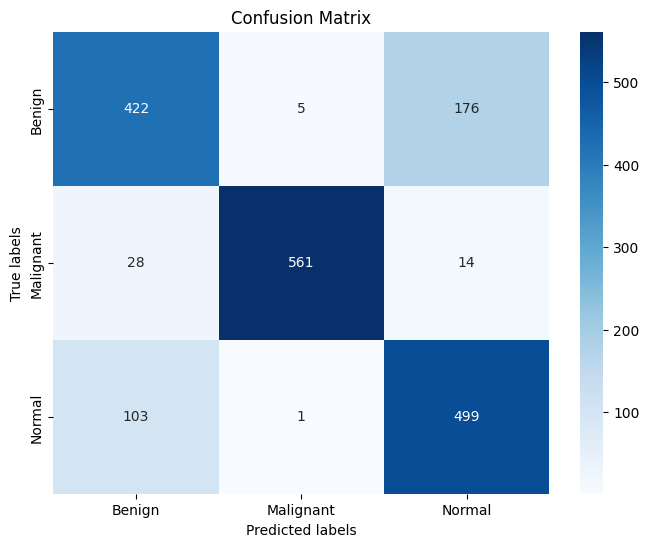

Classification Report:
              precision    recall  f1-score   support

      Benign       0.76      0.70      0.73       603
   Malignant       0.99      0.93      0.96       603
      Normal       0.72      0.83      0.77       603

    accuracy                           0.82      1809
   macro avg       0.83      0.82      0.82      1809
weighted avg       0.83      0.82      0.82      1809



In [3]:
from tensorflow.keras.applications import NASNetMobile


# Load MobileNet model with pre-trained weights (excluding the top layers)
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base MobileNet layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add a Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add the final output layer with 3 units (assuming 3 classes) and softmax activation
model.add(Dense(3, activation='softmax'))

# Print model summary
model.summary()

# Compile the model with Adam optimizer and custom learning rate
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Train the model using augmented training data
history = model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_data=(val_images, val_labels))

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Predict labels for test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute validation loss and accuracy from history
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_names = ['Benign', 'Malignant', 'Normal']
print('Classification Report:')
print(classification_report(true_labels, y_pred_labels, target_names=class_names))

51877672/51877672 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d_1  (None, 1664)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 3)                 4995      
                                                                 
Total params: 12647875 (48.25 MB)
Trainable params: 4995 (19.51 KB)
Non-trainable params: 12642880 (48.23 MB)
_________________________________________________________________
Epoch 1/10
788/788 [==============================] - 223s 272ms/step - loss: 0.4455 - accuracy: 0.8040 - val_loss: 0.3563 - val_accuracy: 0.86

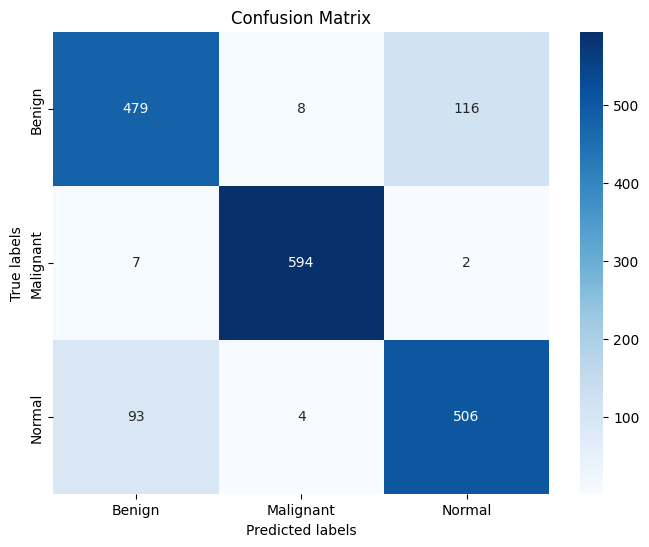

Classification Report:
              precision    recall  f1-score   support

      Benign       0.83      0.79      0.81       603
   Malignant       0.98      0.99      0.98       603
      Normal       0.81      0.84      0.82       603

    accuracy                           0.87      1809
   macro avg       0.87      0.87      0.87      1809
weighted avg       0.87      0.87      0.87      1809



In [4]:
from tensorflow.keras.applications import DenseNet169


# Load MobileNet model with pre-trained weights (excluding the top layers)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base MobileNet layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add a Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add the final output layer with 3 units (assuming 3 classes) and softmax activation
model.add(Dense(3, activation='softmax'))

# Print model summary
model.summary()

# Compile the model with Adam optimizer and custom learning rate
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Train the model using augmented training data
history = model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_data=(val_images, val_labels))

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Predict labels for test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute validation loss and accuracy from history
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_names = ['Benign', 'Malignant', 'Normal']
print('Classification Report:')
print(classification_report(true_labels, y_pred_labels, target_names=class_names))

74836368/74836368 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_2  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 3)                 5763      
                                                                 
Total params: 18327747 (69.91 MB)
Trainable params: 5763 (22.51 KB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________
Epoch 1/10
788/788 [==============================] - 280s 342ms/step - loss: 0.4566 - accuracy: 0.8002 - val_loss: 0.3349 - val_accuracy: 0.87

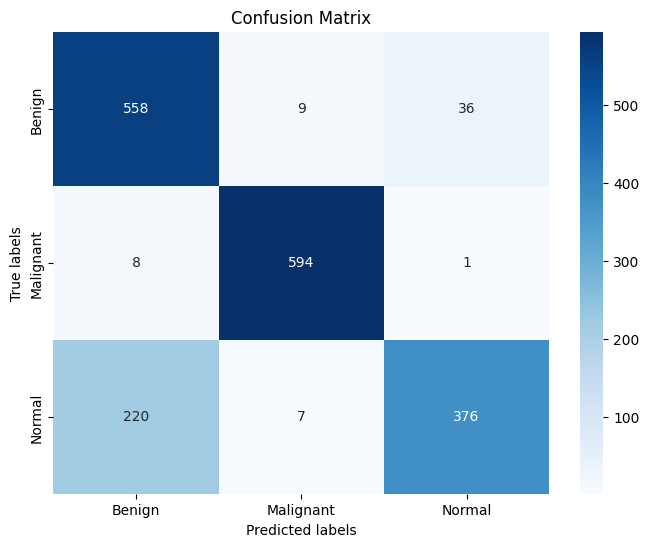

Classification Report:
              precision    recall  f1-score   support

      Benign       0.71      0.93      0.80       603
   Malignant       0.97      0.99      0.98       603
      Normal       0.91      0.62      0.74       603

    accuracy                           0.84      1809
   macro avg       0.86      0.84      0.84      1809
weighted avg       0.86      0.84      0.84      1809



In [5]:
from tensorflow.keras.applications import DenseNet201


# Load MobileNet model with pre-trained weights (excluding the top layers)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base MobileNet layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add a Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add the final output layer with 3 units (assuming 3 classes) and softmax activation
model.add(Dense(3, activation='softmax'))

# Print model summary
model.summary()

# Compile the model with Adam optimizer and custom learning rate
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Train the model using augmented training data
history = model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_data=(val_images, val_labels))

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Predict labels for test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute validation loss and accuracy from history
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_names = ['Benign', 'Malignant', 'Normal']
print('Classification Report:')
print(classification_report(true_labels, y_pred_labels, target_names=class_names))

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________
Epoch 1/10
788/788 [==============================] - 96s 112ms/step - loss: 1.

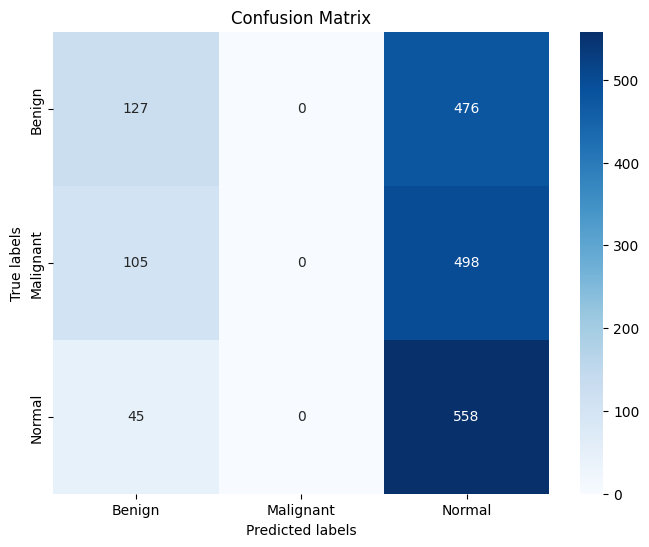

Classification Report:
              precision    recall  f1-score   support

      Benign       0.46      0.21      0.29       603
   Malignant       0.00      0.00      0.00       603
      Normal       0.36      0.93      0.52       603

    accuracy                           0.38      1809
   macro avg       0.27      0.38      0.27      1809
weighted avg       0.27      0.38      0.27      1809



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from tensorflow.keras.applications import EfficientNetB0


# Load MobileNet model with pre-trained weights (excluding the top layers)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base MobileNet layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add a Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add the final output layer with 3 units (assuming 3 classes) and softmax activation
model.add(Dense(3, activation='softmax'))

# Print model summary
model.summary()

# Compile the model with Adam optimizer and custom learning rate
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Train the model using augmented training data
history = model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_data=(val_images, val_labels))

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Predict labels for test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute validation loss and accuracy from history
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_names = ['Benign', 'Malignant', 'Normal']
print('Classification Report:')
print(classification_report(true_labels, y_pred_labels, target_names=class_names))

28456008/28456008 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 6934967 (26.45 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________
Epoch 1/10
788/788 [==============================] - 104s 119ms/step - loss: 1

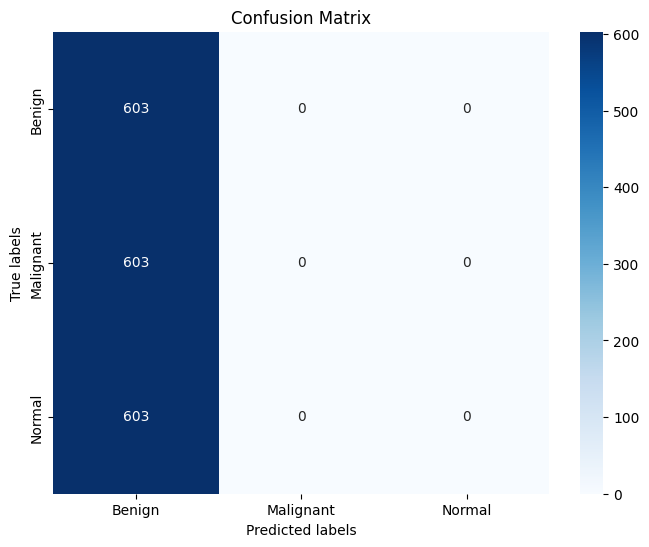

Classification Report:
              precision    recall  f1-score   support

      Benign       0.33      1.00      0.50       603
   Malignant       0.00      0.00      0.00       603
      Normal       0.00      0.00      0.00       603

    accuracy                           0.33      1809
   macro avg       0.11      0.33      0.17      1809
weighted avg       0.11      0.33      0.17      1809



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from tensorflow.keras.applications import EfficientNetV2B1


# Load MobileNet model with pre-trained weights (excluding the top layers)
base_model = EfficientNetV2B1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base MobileNet layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained base model
model.add(base_model)

# Add a Global Average Pooling 2D layer
model.add(GlobalAveragePooling2D())

# Add the final output layer with 3 units (assuming 3 classes) and softmax activation
model.add(Dense(3, activation='softmax'))

# Print model summary
model.summary()

# Compile the model with Adam optimizer and custom learning rate
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Train the model using augmented training data
history = model.fit(train_images, train_labels, epochs=10, batch_size=8, validation_data=(val_images, val_labels))

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Predict labels for test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute validation loss and accuracy from history
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy:.4f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_names = ['Benign', 'Malignant', 'Normal']
print('Classification Report:')
print(classification_report(true_labels, y_pred_labels, target_names=class_names))